## **VISUALISATION**

**Get a list of the available seaborn datasets.**

In [1]:
import seaborn as sns
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

**Load the "penguins" seaborn dataset and have a quick look at it (use 'display' or 'print').**

In [2]:
df = sns.load_dataset("penguins")
display(df)   

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


There are quite a few NaN values in this dataset, but since we are only focussig on visualisation for this session, let's ignore them....

But now we have a sence of the different variables that we can plot.

# ***LINE PLOTS***

**Use matplotlib to plot the 'bill length' and the 'flipper length' on the same line graph.**

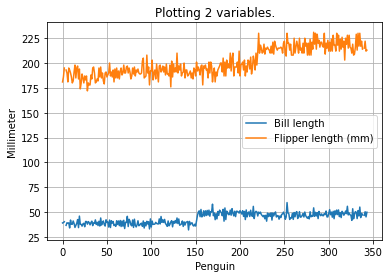

In [4]:
import matplotlib.pyplot as plt

plt.plot(df['bill_length_mm'],label='Bill length')
plt.plot(df['flipper_length_mm'],label='Flipper length (mm)')
plt.xlabel('Penguin')
plt.ylabel('Millimeter')
plt.title('Plotting 2 variables.')
plt.legend()
plt.grid()

**Now plot the 'body mass' and the 'flipper length' on the same line graph.**



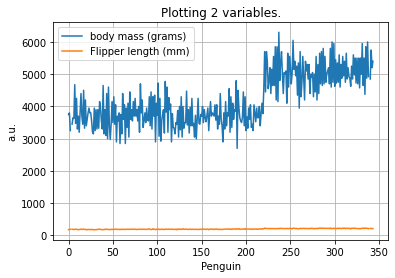

In [5]:
plt.plot(df['body_mass_g'],label='body mass (grams)')
plt.plot(df['flipper_length_mm'],label='Flipper length (mm)')
plt.grid()
plt.xlabel('Penguin')
plt.ylabel('a.u.')
plt.title('Plotting 2 variables.')
plt.legend()

Well, that doesn't look good. And the units of each variable is different, which can easily confuse a reader.

**Plot the 'body mass' and the 'flipper length' again in the same graph but on different y-axis.**

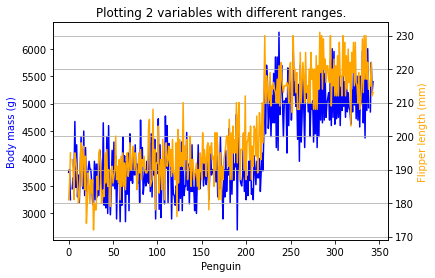

In [6]:
fig,ax = plt.subplots()
## FIRST PLOT
ax.plot(df['body_mass_g'], color="blue", label='Body Mass (grams)')
# set x-axis label
ax.set_xlabel('Penguin')
# set y-axis label
ax.set_ylabel('Body mass (g)', color="blue")

## SECOND PLOT (different y-axis on the sample plot)
ax2=ax.twinx()
ax2.plot(df['flipper_length_mm'], color="orange", label='Flipper length (mm)')
ax2.set_ylabel('Flipper length (mm)', color="orange")
ax2.set_title('Plotting 2 variables with different ranges.')
ax2.grid()


# ***SCATTER PLOTS***

**Plot the 'body mass' and the 'flipper length' on a scatter plot.**

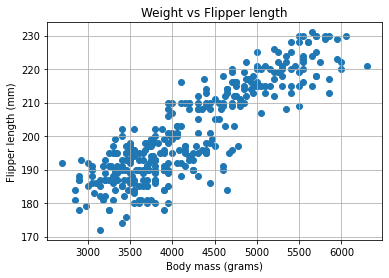

In [7]:
plt.scatter(df['body_mass_g'],df['flipper_length_mm'])
plt.xlabel('Body mass (grams)')
plt.ylabel('Flipper length (mm)')
plt.title('Weight vs Flipper length')
plt.grid()

The relationship between these 2 variables can now easily be deduced.

# ***HISTOGRAMS***

**Create a histogram of the 'body mass' with 80 bins.**

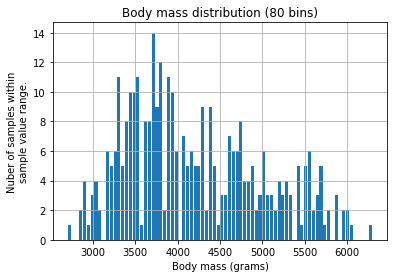

In [10]:
plt.hist(df['body_mass_g'], bins=80, rwidth=0.8)
plt.ylabel('Nuber of samples within\nsample value range.')
plt.xlabel('Body mass (grams)')
plt.title('Body mass distribution (80 bins)')
plt.grid()

This looks kinda noisy. It looks like there seems to be between 7 and 9 'clusters'. 
Let's play with the number of bins. 

**Plot a new histogram with 8 bins.**

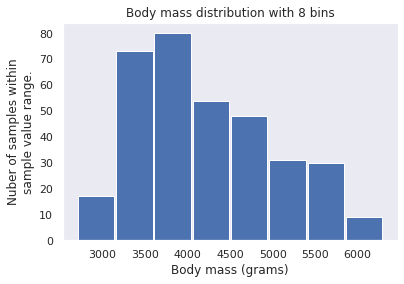

In [17]:
plt.hist(df['body_mass_g'], bins=8, rwidth=0.95) #, density=True)
plt.ylabel('Nuber of samples within\nsample value range.')
plt.xlabel('Body mass (grams)')
plt.title('Body mass distribution with 8 bins')
plt.grid()

That is better. The most penguins seems to have a body mass between about 3200 and 4000 grams.

**Recreate the same histogram with 8 bins using seaborn (with the kernel density).**

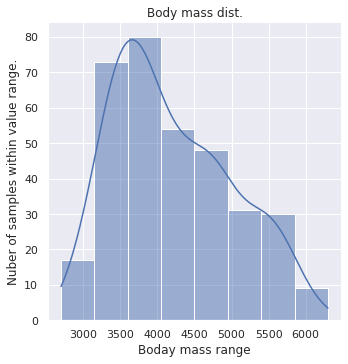

In [16]:
sns.set_theme()
p = sns.displot(df['body_mass_g'], bins=8, kde=True)
p.set(xlabel='Boday mass range',ylabel='Nuber of samples within value range.', title='Body mass dist.')

The peak seems to be around 3600 grams.

# ***BAR PLOTS***

**Load the "diamonds" seaborn dataset.**

In [18]:
data = sns.load_dataset('diamonds')
display(data)   

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Create a bar plot with seaborn** where "cut" is on the x-axis, "carat" is on the y-axis and the bars (hue) represent the "color". 

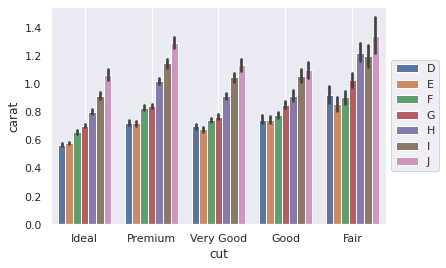

In [22]:
sns.barplot(x='cut', y='carat',hue='color', data=data)
plt.legend(bbox_to_anchor=(1,0.5), loc="center left")
plt.grid()

# ***HEAT MAPS***

**Create a heatmap looking at 'cut' and 'color'.** Hint: use groupby and have a look to make sure that the data looks correct.

cut    Ideal  Premium  Very Good  Good  Fair
color                                       
D       2834     1603       1513   662   163
E       3903     2337       2400   933   224
F       3826     2331       2164   909   312
G       4884     2924       2299   871   314
H       3115     2360       1824   702   303
I       2093     1428       1204   522   175
J        896      808        678   307   119


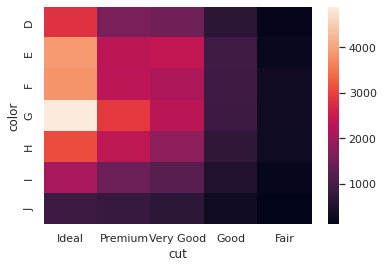

In [27]:
df_m = data.groupby(["cut", "color"]).size().unstack(level=0)
print(df_m)
sns.heatmap(df_m, annot=False)

# ***PIE PLOTS***

**Create a Pie plot looking at 'cut' and 'color'. Visualise the color breakdown for a 'Fair' cut.**

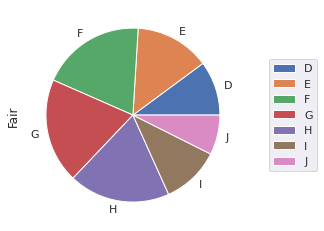

In [30]:
plot = df_m.plot.pie(y='Fair')
plt.legend(bbox_to_anchor=(1.1,0.5), loc="center left")

**Finally create a Pie plot looking at 'cut' breakdown for a specific color ('G').**

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678
Good,662,933,909,871,702,522,307
Fair,163,224,312,314,303,175,119


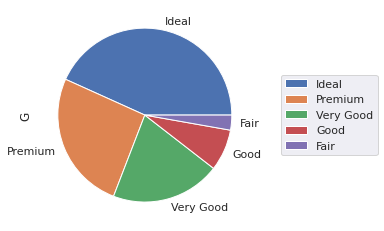

In [31]:
df_m_trans = df_m.transpose()
display(df_m_trans)

plot = df_m_trans.plot.pie(y='G')
plt.legend(bbox_to_anchor=(1.1,0.5), loc="center left")

## **DONE!!!!!**

